In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

import tensorflow as tf
import pickle
import os
import glob
import random
import sys
import datetime
import wispy
import wispy.resnet
import wispy.logger
import wispy.utils
import wispy.callbacks
import wispy.model_utils
from tomlkit import parse
from tensorflow.keras.utils import get_custom_objects
import pugna.activations

plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [2]:
sys.path.append("../../")

In [3]:
import fit

In [4]:
get_custom_objects().update({'s2relu': pugna.activations.s2relu})

In [5]:
%matplotlib inline

In [6]:
glob.glob("009/checkpoint/*")[-1]

'009/checkpoint/cp-10000.ckpt'

In [12]:
config_file = "config_009.toml"

In [13]:
##### model = tf.keras.models.load_model('009/checkpoint/cp-08480.ckpt',
#                                    custom_objects={'ScaleLayer': wispy.mscalev3.ScaleLayer}
#                                   )

model = tf.keras.models.load_model('009/model.h5',
                                   custom_objects={'ScaleLayer': wispy.mscalev3.ScaleLayer}
                                  )

In [14]:
with open(config_file, "r") as f:
    text = f.read()

doc = parse(text)

In [15]:
doc['data']['train_root_dir']

'../training_data'

In [16]:
doc['data']['data_to_model']

'amps'

In [17]:
filename = doc['data']['y_preprocessing_params_file']
y_processing_params = np.load(filename)

In [18]:
# y_train = fit.load_coprec_data_and_apply_preproc(doc['data']['train_root_dir'], doc['data']['data_to_model'], y_processing_params)
# y_train = fit.load_coprec_data_and_apply_preproc(doc['data']['val_root_dir'], doc['data']['data_to_model'], y_processing_params)

y_train_22 = fit.load_coprec_data_and_apply_preproc(doc['data']['val_root_dir'], "amp_22", y_processing_params)
y_train_21 = fit.load_coprec_data_and_apply_preproc(doc['data']['val_root_dir'], "amp_21", y_processing_params)

In [19]:
y_train_22.shape

(1000, 1219)

In [20]:
filename = doc['data']['times_file']
times = np.load(filename)

pkl_filename = doc['data']['times_scaler']
with open(pkl_filename, 'rb') as file:
    times_scaler = pickle.load(file)

times_scaled = times_scaler.transform(times[:, np.newaxis])

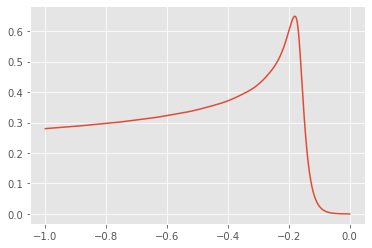

In [21]:
plt.figure()
plt.plot(times_scaled, y_train_22[0])

In [22]:
# filename = doc['data']['coords_train_file']
filename = doc['data']['coords_val_file']
coords_train = np.load(filename).T

In [23]:
def get_input_for_ann(times, coords):
    return np.column_stack((times[:, 0], (coords*np.ones(times.shape))))

In [24]:
X = get_input_for_ann(times_scaled, coords_train[0])

In [25]:
X.shape

(1219, 8)

In [26]:
coords_train.shape

(1000, 7)

In [27]:
model.predict(X)[:,0]

array([2.8020835e-01, 2.8026474e-01, 2.8032020e-01, ..., 1.8869340e-04,
       1.9070506e-04, 1.9834936e-04], dtype=float32)

In [28]:
def compare_amp22(index, model, times_scaled, coords, y_train):
    print(coords[index])
    X = get_input_for_ann(times_scaled, coords[index])
    yhat = model.predict(X)[:,0]
    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(times_scaled, y_train[index], label='data')
    plt.plot(times_scaled, yhat, label='model')
    plt.title("amp 22")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(times_scaled, y_train[index]-yhat)
    plt.show()
    plt.close()

In [29]:
def compare_amp21(index, model, times_scaled, coords, y_train):
    print(coords[index])
    X = get_input_for_ann(times_scaled, coords[index])
    yhat = model.predict(X)[:,1]
    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(times_scaled, y_train[index], label='data')
    plt.plot(times_scaled, yhat, label='model')
    plt.title("amp 21")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(times_scaled, y_train[index]-yhat)
    plt.show()
    plt.close()

[3.52966636 0.43513474 1.25762855 3.39978665 0.38097022 2.57325398
 5.5918269 ]


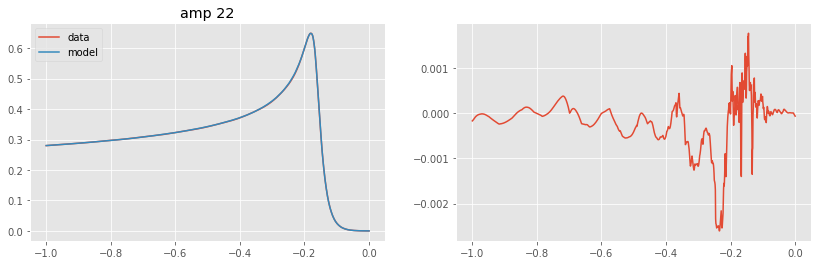

In [30]:
compare_amp22(0, model, times_scaled, coords_train, y_train_22)

[3.52966636 0.43513474 1.25762855 3.39978665 0.38097022 2.57325398
 5.5918269 ]


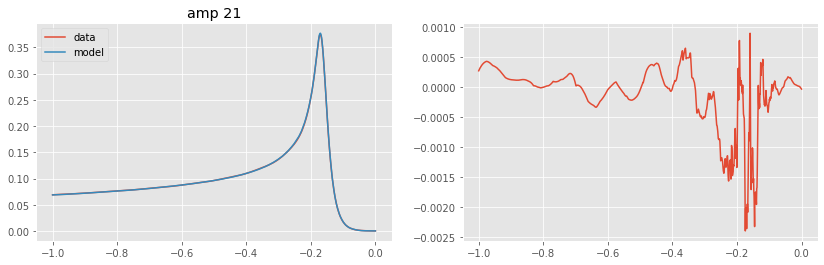

In [31]:
compare_amp21(0, model, times_scaled, coords_train, y_train_21)

789
[2.88203452 0.87751553 0.15820493 3.37581958 0.64770387 1.69488109
 4.12127106]


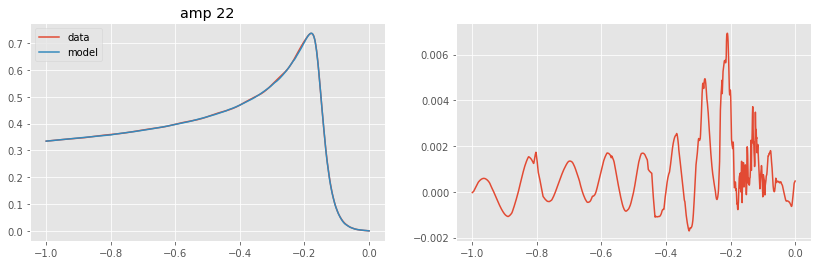

534
[3.11081086 0.73208735 1.82519982 3.84182061 0.06588102 1.85880419
 3.23277057]


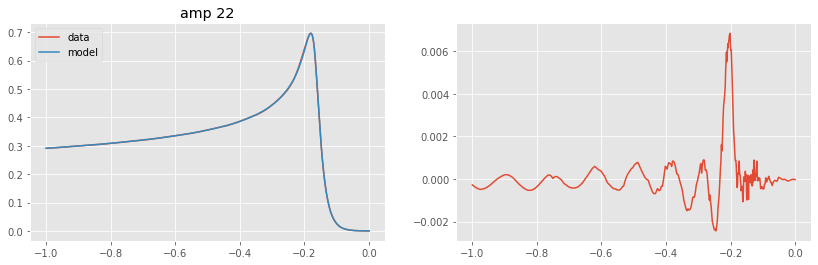

594
[3.32126728 0.57405807 0.60918069 2.10276294 0.66227392 1.32138345
 3.13259771]


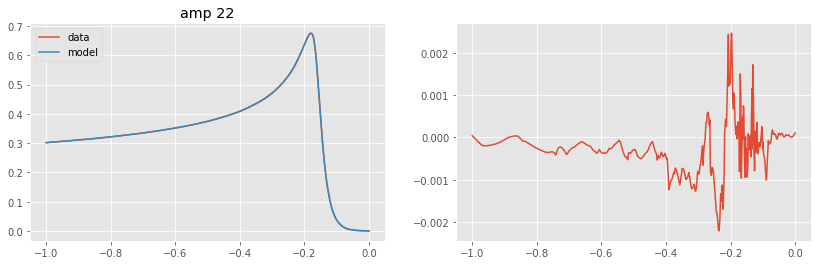

835
[1.30643688 0.62487384 0.97271766 0.6258185  0.87434133 1.89702681
 4.99790035]


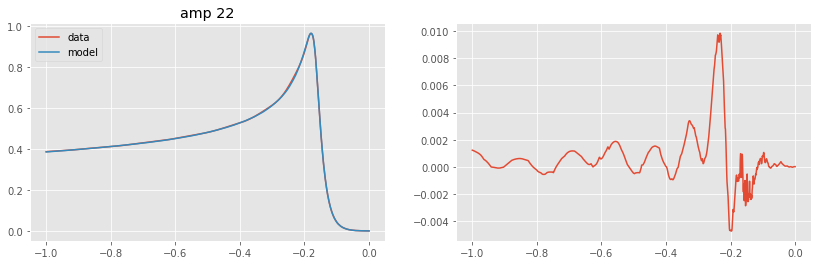

920
[2.20672189 0.70978161 2.38017607 2.80004799 0.84783004 1.2757217
 2.97982701]


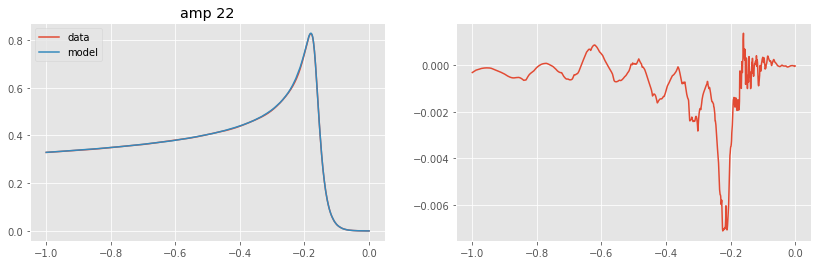

503
[3.01331900e+00 7.67652539e-04 1.62983424e+00 3.38956208e+00
 1.27483591e-01 6.27880180e-01 4.71442776e+00]


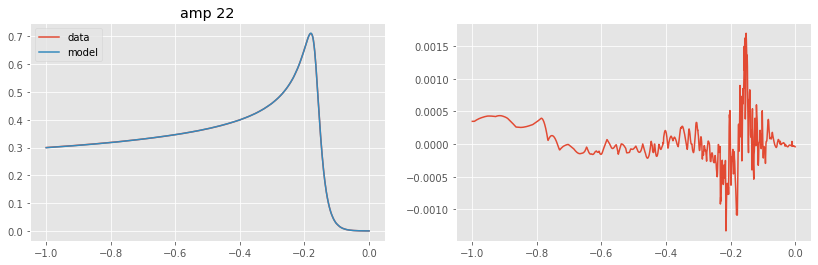

429
[1.75415555 0.36081914 2.22565941 1.90019335 0.65696139 1.39740289
 4.63264845]


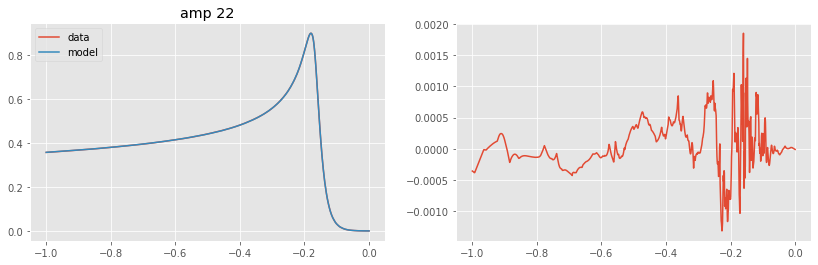

182
[2.78903006 0.23737669 2.70475252 3.43827813 0.1341007  2.75464368
 2.8426798 ]


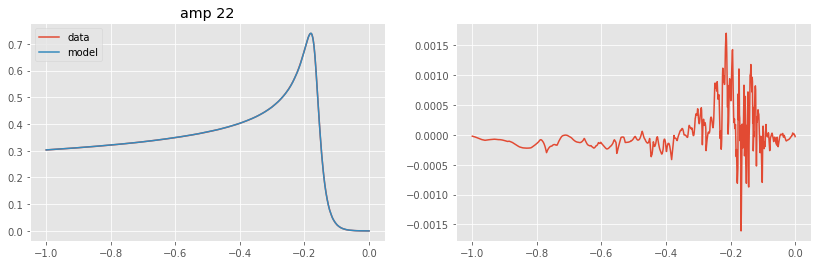

452
[2.36700304 0.61644697 0.62221862 3.22055692 0.46905385 0.44041724
 3.85114433]


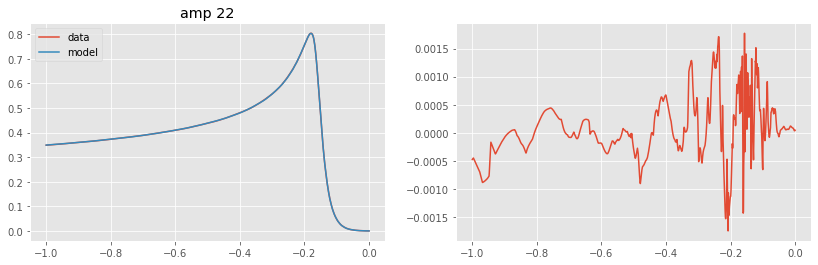

506
[3.77436148 0.95136051 1.41839914 5.08366547 0.03637776 2.72725631
 2.71057501]


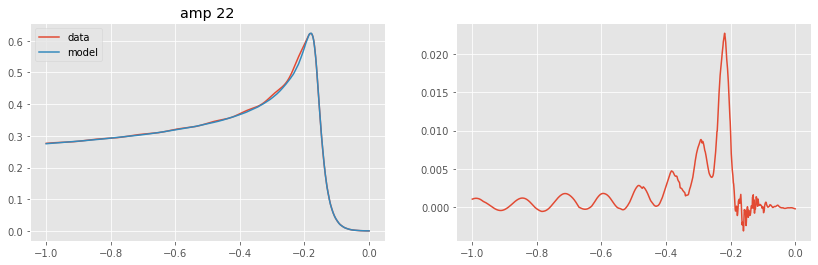

In [36]:
for i in random.sample(range(len(coords_train)), 10):
    print(i)
    compare_amp22(i, model, times_scaled, coords_train, y_train_22)

314
[1.45045866 0.6643531  1.71740941 4.78369104 0.66769895 0.83330605
 1.44333093]


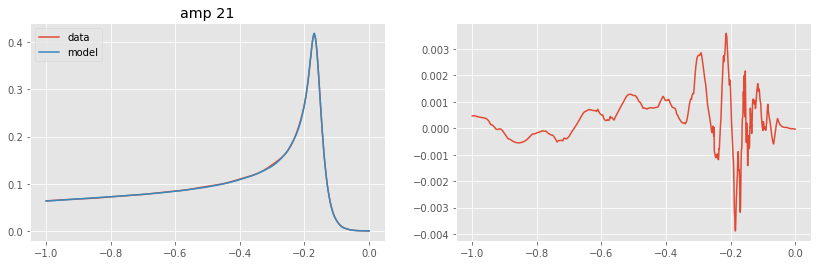

410
[3.01164867 0.25410149 1.59202399 0.54170215 0.38489002 1.28538818
 1.8792807 ]


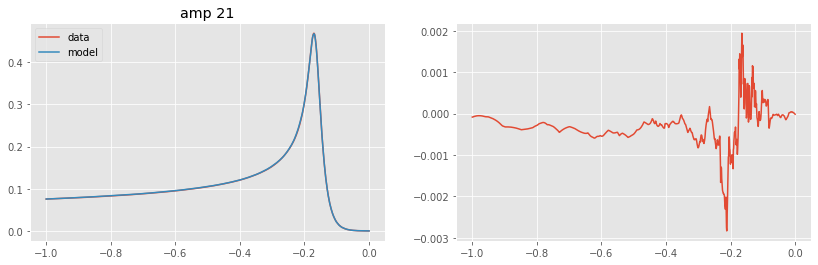

710
[3.39846345 0.89228035 1.69710981 2.02859482 0.4012648  1.23497189
 4.01688699]


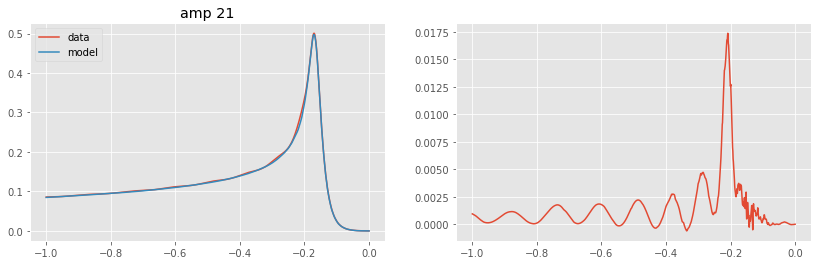

584
[3.7916914  0.27761972 2.51779075 1.13081555 0.11826952 0.98144797
 0.89770621]


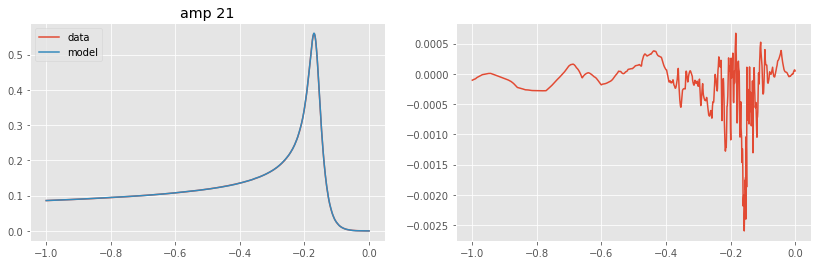

903
[3.74028736 0.84311261 2.08950246 5.99787525 0.70383099 2.3440627
 4.66418678]


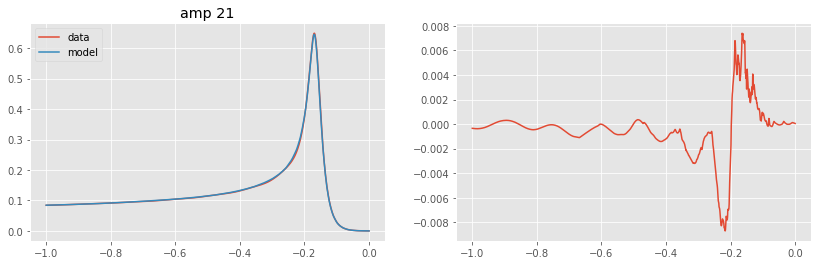

642
[3.28715676 0.90768507 0.77453429 2.48860331 0.14042074 1.25225587
 4.50562583]


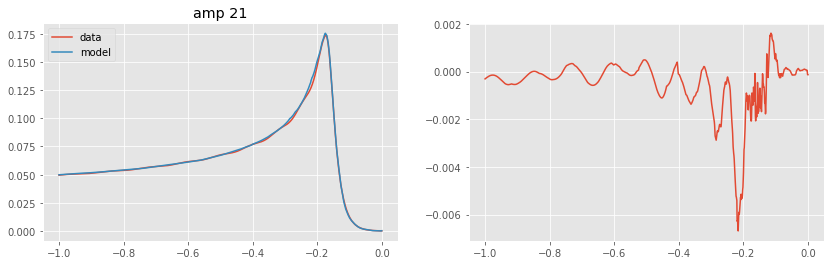

569
[1.56113503 0.72212998 0.95538333 2.16892993 0.87034932 1.23543887
 4.85521872]


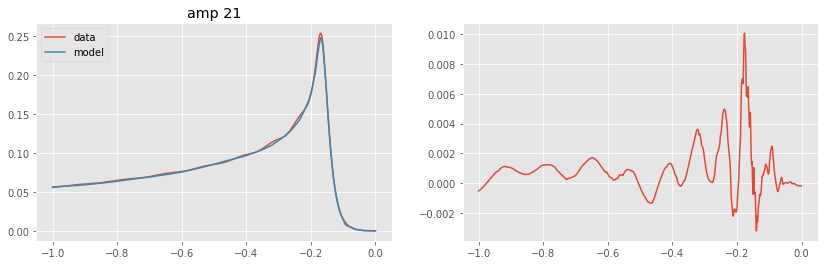

741
[2.65883783 0.88558056 0.76958748 0.8659144  0.44996498 2.32979953
 0.62012293]


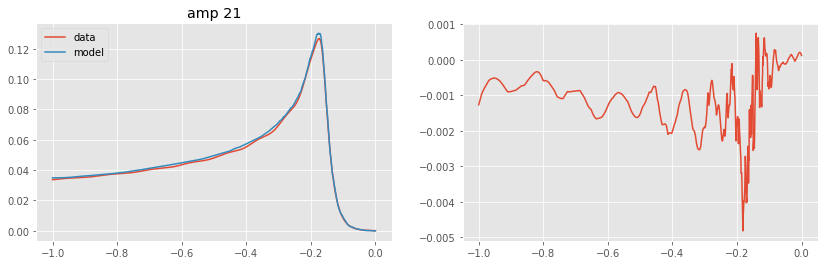

620
[3.70470445 0.33427815 1.87433896 5.4307635  0.41641099 1.70362114
 2.63693247]


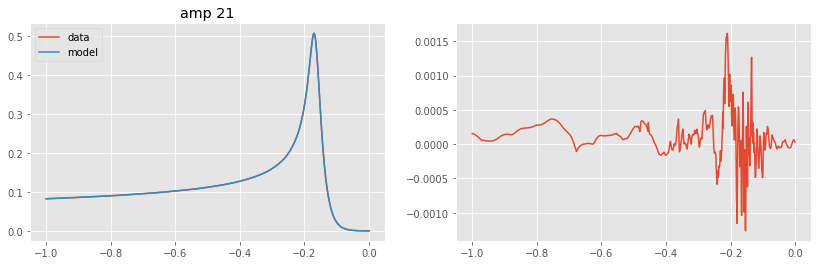

510
[3.34945812 0.10094036 2.06085924 4.56146457 0.85703293 1.56053727
 1.85629873]


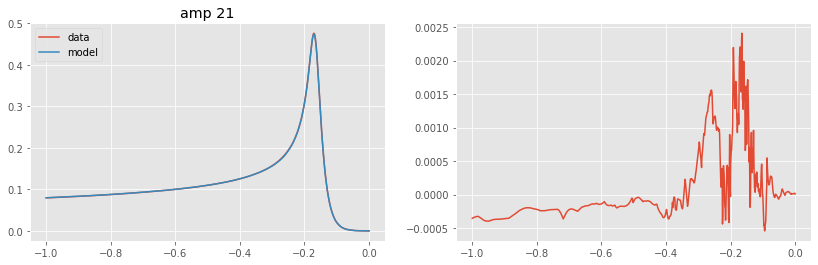

In [37]:
for i in random.sample(range(len(coords_train)), 10):
    print(i)
    compare_amp21(i, model, times_scaled, coords_train, y_train_21)